<a href="https://colab.research.google.com/github/anassbouchfar/Bank_marketing_ML_DL/blob/main/Classification%26Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

## Importer les librairies

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
import warnings

## Importer l'ensemble de données

In [ ]:
data=pd.read_csv("bank.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Vérifier les valeurs nulles

In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Il n'y a pas de valeurs nulles dans l'ensemble de données

## Vérifier les valeurs dupliquées

In [ ]:
data.duplicated().sum()

0

Il n'y a pas de valeurs dupliquées dans l'ensemble de données

## Résumé statistique de l'ensemble de données

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## Les types des variables de l'ensemble de données

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## Vérifier la balance de l'ensemble des données

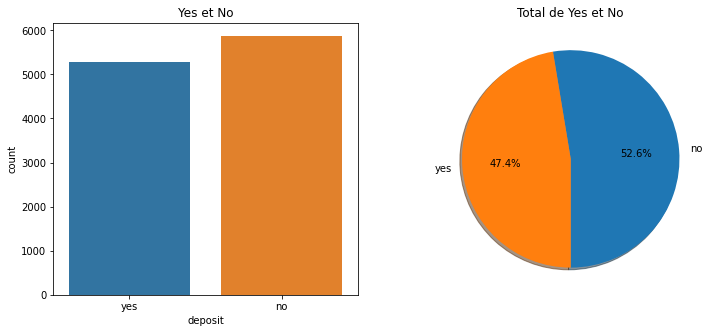

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='deposit',data=data)
plt.title("Yes et No")
plt.subplot(1,2,2)
labels =data['deposit'].value_counts(sort = True).index
sizes = data['deposit'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Total de Yes et No',size = 12)
plt.show()

Notre ensemble de données est en balance 

## Analyse du type de données d'objet

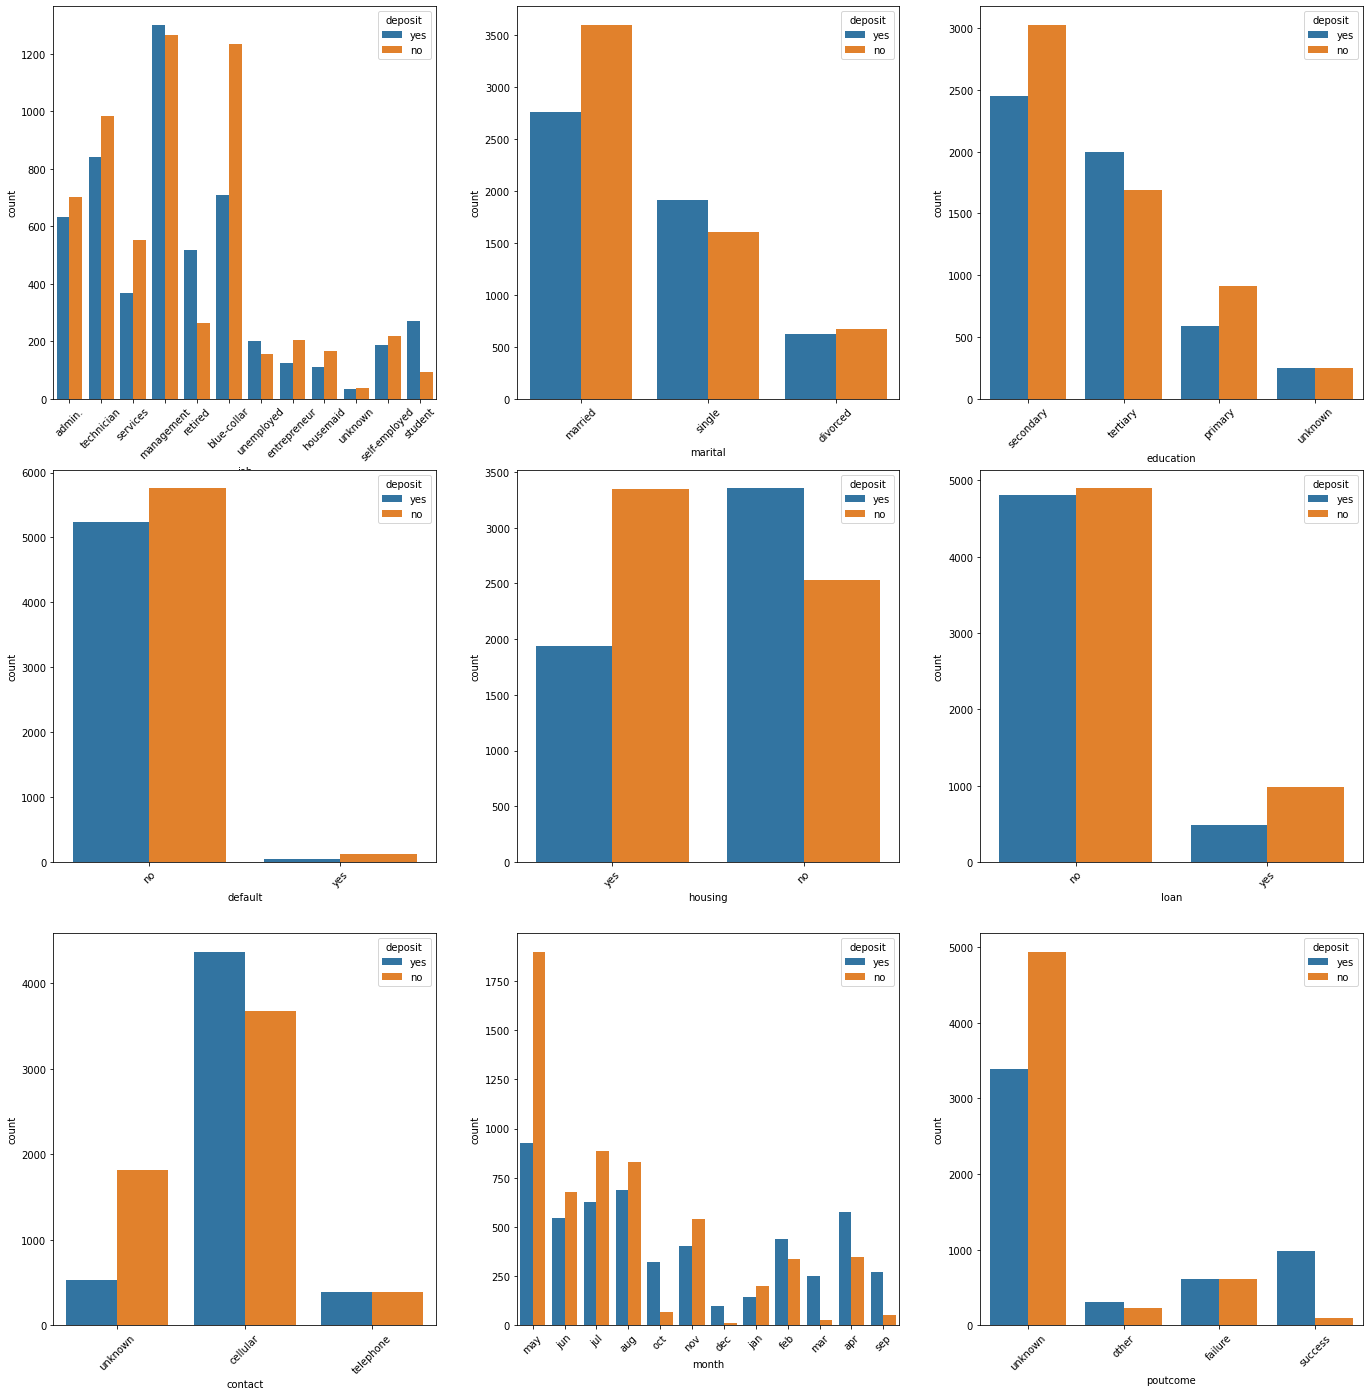

In [ ]:
colonnes_obj=data.select_dtypes('O').columns
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
fig.tight_layout(pad=5.0)
for col, ax in zip(colonnes_obj, axes.flatten()):
    sns.countplot(x=col,data=data, hue='deposit', ax=ax)
    ax.tick_params(axis='x', rotation=45)

plt.show()

## Analyse du type de données numérique


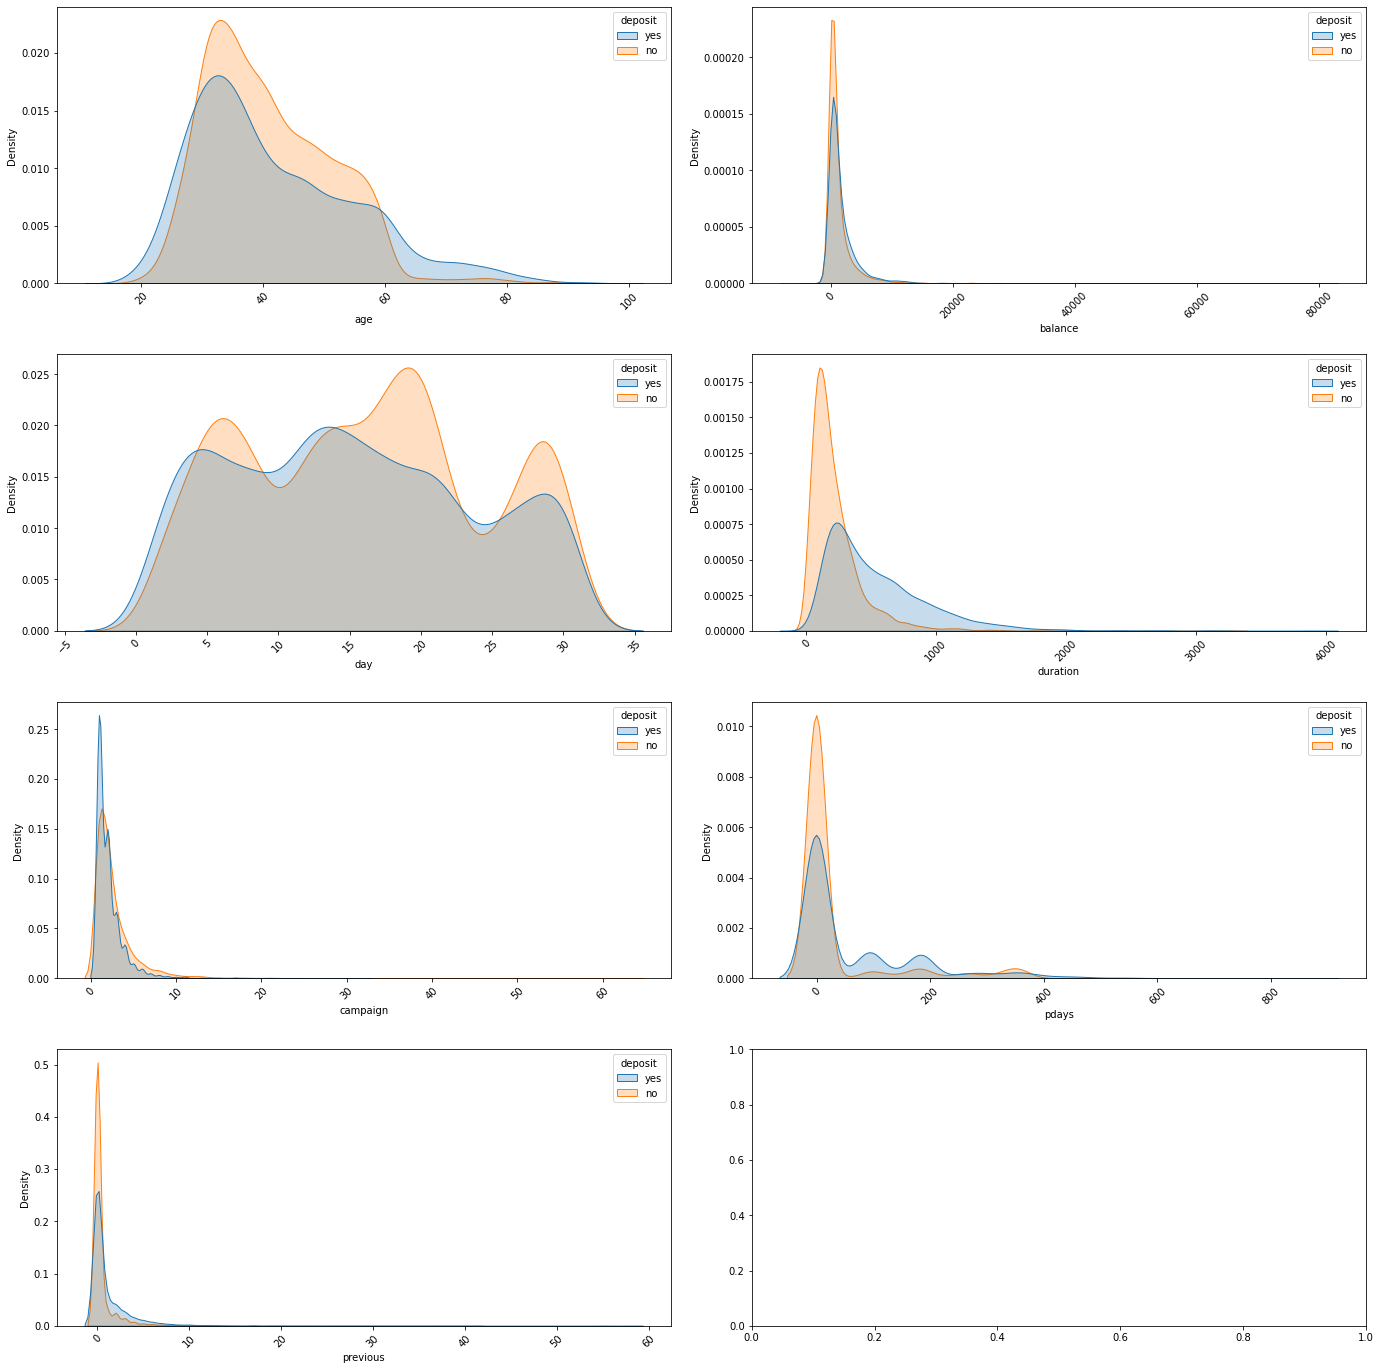

In [ ]:
colonnes_int=data.select_dtypes('int').columns
fig, axes = plt.subplots(4,2, figsize=(20, 20))
fig.tight_layout(pad=5.0)
for col, ax in zip(colonnes_int, axes.flatten()):
    sns.kdeplot(x=col,data=data, hue='deposit', ax=ax, fill=True)
    ax.tick_params(axis='x', rotation=45)

## Corrélation entre les variables

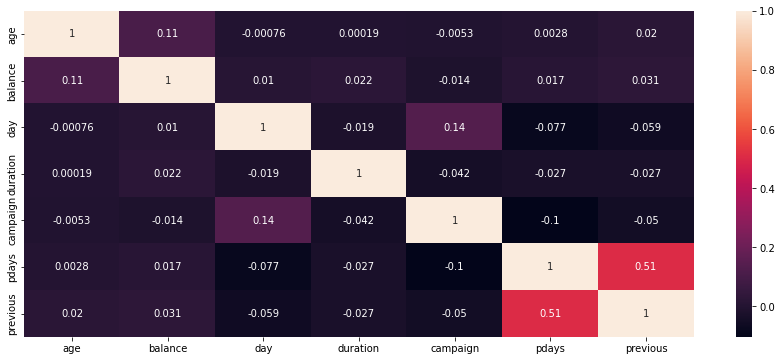

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

Il existe une corrélation modérée entre "pdays" et "previous", il est donc nécessaire de supprimer l'une d'entre elles. Pour décider quelle colonne doit etre supprimer, nous comparons leur Score d'Information Mutuelle.



In [ ]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores( data.loc[:, data.dtypes==int], data['deposit'], 'auto')
mi_scores[::3]

duration    0.163607
age         0.025022
day         0.016236
Name: MI Scores, dtype: float64

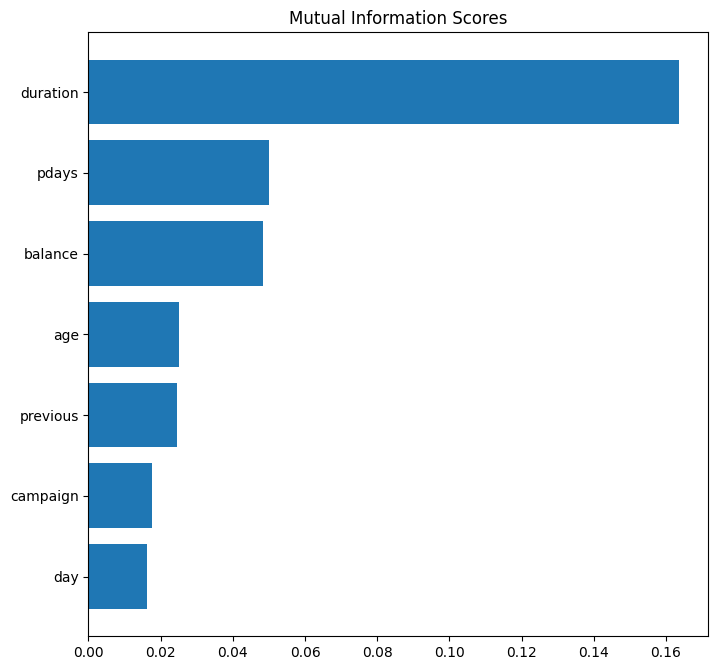

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 8))
plot_mi_scores(mi_scores)


Donc on supprime la colonne "previous".



In [ ]:
data.drop('previous',axis=1,inplace=True)

## Vérification des valeurs aberrantes

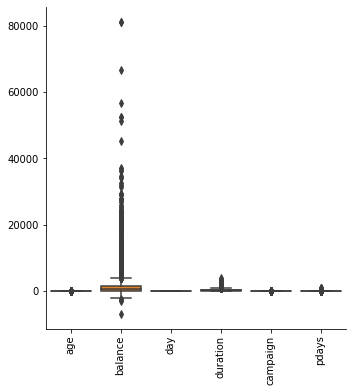

In [ ]:
sns.catplot(data=data,kind='box')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


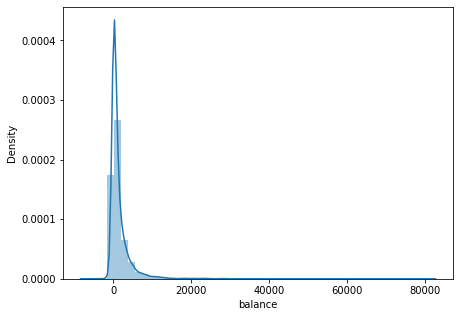

In [ ]:
# on remarque qu'il existe des valeurs aberrantes dans la colonne "balance" 
plt.figure(figsize=(7,5))
sns.distplot(data['balance'])
plt.show()

Les données supérieures à 20 000 peuvent être supprimées pour éviter le risque de valeurs aberrantes.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


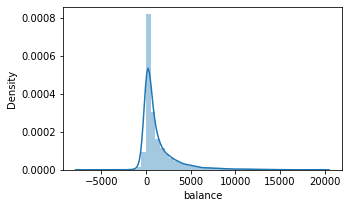

In [ ]:
i=data['balance'][data['balance']>20000].index
data.drop(i,inplace=True)
plt.figure(figsize=(5,3))
sns.distplot(data['balance'])
plt.show()

Maintenant, la colonne "balance" semble être quelque peu normalement distribué.

#Encodage de l'ensemble des données & Data Preprocessing

## Encodage de la colonne "deposit"

In [ ]:
data['deposit'] = data['deposit'].map({'no': 0, 'yes': 1})

## Encodage de la colonne "month"

In [ ]:
dict_mois = {'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6,
             'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12}
data['month'] = data['month'].map(dict_mois)

## Encodage des colonnes "default","housing" et "loan"

In [ ]:
#default :
data.default.replace({'no' : 0, 'yes' : 1}, inplace = True)
#housing :
data.housing.replace({'no' : 0, 'yes' : 1}, inplace = True)
#loan :
data.loan.replace({'no' : 0, 'yes' : 1}, inplace = True)

## Encodage de la colonne "marital"

In [ ]:
marital_dummies = pd.get_dummies(data['marital'], prefix = 'marital')
marital_dummies.drop('marital_divorced', axis=1, inplace=True)
data = pd.concat([data, marital_dummies], axis=1)

## Encodage de la colonne "job"

In [ ]:
job_dummies = pd.get_dummies(data['job'], prefix = 'job')
job_dummies.drop('job_unknown', axis=1, inplace=True)
data= pd.concat([data, job_dummies], axis=1)

## Encodage de la colonne "education"

In [ ]:
education_dummies = pd.get_dummies(data['education'], prefix = 'education')
education_dummies.drop('education_unknown', axis=1, inplace=True)
data = pd.concat([data, education_dummies], axis=1)

## Encodage de la colonne "contact"

In [ ]:
contact_dummies = pd.get_dummies(data['contact'], prefix = 'contact')
contact_dummies.drop('contact_unknown', axis=1, inplace=True)
data = pd.concat([data, contact_dummies], axis=1)

## Encodage de la colonne "poutcome"

In [ ]:
poutcome_dummies = pd.get_dummies(data['poutcome'], prefix = 'poutcome')
poutcome_dummies.drop('poutcome_unknown', axis=1, inplace=True)
data = pd.concat([data, poutcome_dummies], axis=1)

## Encodage de la colonne "pdays"

Si la valeur de 'pdays' est 999 alors le client n'a pas été contacté auparavant et si la valeur de 'pdays' est '-1', si c'est le cas, nous l'associerons à une valeur de 0.

In [ ]:
data['pdays'] = data['pdays'].apply(lambda row: 0 if row == -1 else 1)

## Supprimer les colonnes "marital","job","education","contact" et "poutcome"

In [ ]:
data.drop(['job', 'education', 'marital', 'contact', 'poutcome'], axis=1,inplace=True)

## Vérifier le type des données aprés l'encodage

In [ ]:
data.dtypes

age                    int64
default                int64
balance                int64
housing                int64
loan                   int64
day                    int64
month                  int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
deposit                int64
marital_married        uint8
marital_single         uint8
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
contact_cellular       uint8
contact_telephone      uint8
poutcome_failure       uint8
poutcome_other         uint8
poutcome_success       uint8
dtype: object

In [ ]:
data

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,59,0,2343,1,0,5,5,1042,1,0,...,0,0,0,1,0,0,0,0,0,0
1,56,0,45,0,0,5,5,1467,1,0,...,0,0,0,1,0,0,0,0,0,0
2,41,0,1270,1,0,5,5,1389,1,0,...,1,0,0,1,0,0,0,0,0,0
3,55,0,2476,1,0,5,5,579,1,0,...,0,0,0,1,0,0,0,0,0,0
4,54,0,184,0,0,5,5,673,2,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,20,4,257,1,0,...,0,0,1,0,0,1,0,0,0,0
11158,39,0,733,0,0,16,6,83,4,0,...,0,0,0,1,0,0,0,0,0,0
11159,32,0,29,0,0,19,8,156,2,0,...,1,0,0,1,0,1,0,0,0,0
11160,43,0,0,0,1,8,5,9,2,1,...,1,0,0,1,0,1,0,1,0,0


On remarque toutes les données sont bien encodés.

##Enregistrement de notre dataset après l'encodage 

In [ ]:
data.to_csv('datacode.csv', index=False)

# Classification  supervisée (Classification )

### Train and Test dataset

In [ ]:
X = data.drop('deposit', axis=1)
Y = data['deposit']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 32)

In [ ]:
X_train.shape

(8884, 32)

In [ ]:
X_test.shape

(2221, 32)

In [ ]:
y_train.shape

(8884,)

In [ ]:
y_test.shape

(2221,)

### Features Scaling

Nous allons normaliser les variables indépendantes présentes dans l'ensemble de données dans une plage fixe.

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

## Model Training 

### Importer les librairies

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.neural_network import MLPClassifier #Multilayer perceptron
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn import svm

# Classification Supervisée

### KNN

In [ ]:
# faire le test et le train pour k allant de 1 jusqu'à 20
for i in range(2,20):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_s,y_train)
    Y_pred = knn.predict(X_test_s)
    Y_test_pred =  knn.predict(X_test_s)
    knn_test_accuracy = metrics.accuracy_score(y_test,Y_pred)
    knn_train_accuracy = knn.score(X_train_s,y_train)
     
    
    print(f"Pour K={i} le score de précision des tests est {knn_test_accuracy*100:.2f}%".format(i,knn_test_accuracy))
    print(f"Pour K={i} le score de précision du train est {knn_train_accuracy*100:.2f}%".format(i,knn_train_accuracy))
    
    print()

Pour K=2 le score de précision des tests est 71.18%
Pour K=2 le score de précision du train est 84.76%

Pour K=3 le score de précision des tests est 75.78%
Pour K=3 le score de précision du train est 86.28%

Pour K=4 le score de précision des tests est 74.20%
Pour K=4 le score de précision du train est 81.35%

Pour K=5 le score de précision des tests est 76.86%
Pour K=5 le score de précision du train est 82.63%

Pour K=6 le score de précision des tests est 75.60%
Pour K=6 le score de précision du train est 80.22%

Pour K=7 le score de précision des tests est 77.58%
Pour K=7 le score de précision du train est 81.26%

Pour K=8 le score de précision des tests est 76.18%
Pour K=8 le score de précision du train est 79.66%

Pour K=9 le score de précision des tests est 77.22%
Pour K=9 le score de précision du train est 79.39%

Pour K=10 le score de précision des tests est 75.60%
Pour K=10 le score de précision du train est 78.05%

Pour K=11 le score de précision des tests est 76.27%
Pour K=11

Le K qui a plus d'accuracy est : 5

#### Evaluation de performance de KNN5

In [ ]:
knn5= KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_s,y_train)
knn5_train_pred = knn5.predict(X_train_s)
knn5_test_pred =  knn5.predict(X_test_s)
print("Le rapport de l'ensemble d'apprentissage: \n",classification_report(y_train,knn5_train_pred))
print("Le rapport de l'ensemble de test: \n",classification_report(y_test,knn5_test_pred))

Le rapport de l'ensemble d'apprentissage: 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      4670
           1       0.84      0.79      0.81      4214

    accuracy                           0.83      8884
   macro avg       0.83      0.82      0.83      8884
weighted avg       0.83      0.83      0.83      8884

Le rapport de l'ensemble de test: 
               precision    recall  f1-score   support

           0       0.77      0.81      0.79      1175
           1       0.77      0.72      0.75      1046

    accuracy                           0.77      2221
   macro avg       0.77      0.77      0.77      2221
weighted avg       0.77      0.77      0.77      2221



#### Overfitting and underfitting
Le score d'accuracy de l'ensemble d'apprentissage est de 77,44 %, tandis que l'accuracy de l'ensemble de test est de 75,82 %. Ces deux valeurs sont tout à fait comparables. Il n'est donc pas question de overfitting.



In [ ]:
report_knn5_test =classification_report(y_test,knn5_test_pred, output_dict=True )
report_knn5_train =classification_report(y_train,knn5_train_pred, output_dict=True )

### Arbre de décision 

In [ ]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train_s, y_train)
dtc_test_pred = dtc.predict(X_test_s)
dtc_train_pred=dtc.predict(X_train_s)
print("Valeur prédictée: ", dtc_test_pred[:10])
print("Valeur actuelle:  ", y_test[:10].to_numpy())

Valeur prédictée:  [0 0 0 1 0 1 1 1 1 1]
Valeur actuelle:   [0 0 0 1 1 0 1 1 1 1]


#### Evaluation de performance de AD





In [ ]:
print("Le rapport de l'ensemble d'apprentissage: \n", classification_report(y_train,dtc_train_pred))
print("Le rapport de lensemble de test : \n", classification_report(y_test,dtc_test_pred))

Le rapport de l'ensemble d'apprentissage: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4670
           1       1.00      1.00      1.00      4214

    accuracy                           1.00      8884
   macro avg       1.00      1.00      1.00      8884
weighted avg       1.00      1.00      1.00      8884

Le rapport de lensemble de test : 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1175
           1       0.77      0.77      0.77      1046

    accuracy                           0.79      2221
   macro avg       0.79      0.79      0.79      2221
weighted avg       0.79      0.79      0.79      2221



il semble  bien qu'il y a un sur-apprentissage (overfitting), pour résoudre ce problème il y a 3 méthodes qui sont Pre-Pruning ou Post-Pruning l'utlisation de l'algo random forest on va travailler seulement avec les 2 premieres méthodes.

#### Pre-Pruning

La technique de pré-élagage fait référence à l'arrêt précoce de la croissance de l'arbre de décision. La technique de pré-élagage consiste à régler les hyperparamètres du modèle d'arbre décisionnel avant le pipeline de formation. Les hyperparamètres de l'arbre de décision, notamment **max_depth, min_samples_leaf, min_samples_split**, peuvent être réglés afin d'arrêter précocement la croissance de l'arbre et d'éviter que le modèle ne soit surajusté.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

clf = DecisionTreeClassifier(random_state=42)
grid_cv = GridSearchCV(clf, param_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(X_train_s, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", roc_auc_score(y_train, grid_cv.predict(X_train_s)))
print("Test AUC ROC Score for GS: ", roc_auc_score(y_test, grid_cv.predict(X_test_s)))

Param for GS {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
CV score for GS 0.8709530702517622
Train AUC ROC Score for GS:  0.8737143141704667
Test AUC ROC Score for GS:  0.8237280826654734


Le score de précision de l'ensemble de formation est de **87,37%** tandis que la précision de l'ensemble de test est de **82,37%**. Ces deux valeurs sont tout à fait comparables. Il n'y a donc pas de problème de overfitting.

####Post-Pruning
La technique de post-élagage permet au modèle d'arbre de décision de croître jusqu'à sa pleine profondeur, puis supprime les branches de l'arbre pour empêcher le modèle de sur-ajuster. **L'élagage de la complexité des coûts (ccp)** est un type de technique post-élagage. En cas d'élagage de la complexité des coûts, le ccp_alpha peut être ajusté pour obtenir le meilleur modèle d'ajustement.

Le package Scikit-learn est fourni avec l'implémentation pour calculer les valeurs **ccp_alpha** de l'arbre de décision à l'aide de la fonction **cost_complexity_pruning_path**(). Avec l'augmentation des valeurs **ccp_apha**, davantage de nœuds de l'arbre sont élagués.

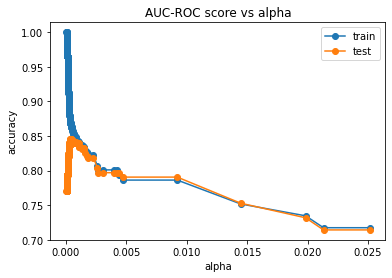

In [ ]:
# Allow a decision tree to grow to its full depth
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_s, y_train)

# compute ccp_alpha values
path = clf.cost_complexity_pruning_path(X_train_s, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# train DT classifier for each ccp_alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train_s, y_train)
    clfs.append(clf)

# Plot train and test score for each of the above trained model    
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [roc_auc_score(y_train, clf.predict(X_train_s)) for clf in clfs]
test_scores = [roc_auc_score(y_test, clf.predict(X_test_s)) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("AUC-ROC score vs alpha")
ax.plot(ccp_alphas, train_scores, marker='o', label="train")
ax.plot(ccp_alphas, test_scores, marker='o', label="test")
ax.legend()
plt.show()

On remarque que la **meilleure** accuracy entre training et testing c'est **85%**.

Alors avec ces 2 méthodes on a résolu le problème d'overfitting.

In [ ]:
clf2 = DecisionTreeClassifier(random_state=42, ccp_alpha=0.001)
clf2.fit(X_train_s, y_train)
clf2_train_pred = clf2.predict(X_train_s)
clf2_test_pred =  clf2.predict(X_test_s)
print("Le rapport de l'ensemble d'apprentissage: \n",classification_report(y_train,clf2_train_pred))
print("Le rapport de l'ensemble de test: \n",classification_report(y_test,clf2_test_pred))

Le rapport de l'ensemble d'apprentissage: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      4670
           1       0.83      0.85      0.84      4214

    accuracy                           0.85      8884
   macro avg       0.85      0.85      0.85      8884
weighted avg       0.85      0.85      0.85      8884

Le rapport de l'ensemble de test: 
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      1175
           1       0.82      0.85      0.83      1046

    accuracy                           0.84      2221
   macro avg       0.84      0.84      0.84      2221
weighted avg       0.84      0.84      0.84      2221



In [ ]:
report_clf2_test =classification_report(y_test,clf2_test_pred, output_dict=True )
report_clf2_train =classification_report(y_train,clf2_train_pred, output_dict=True )

### Naive Bayes

In [ ]:
nb= GaussianNB()
nb.fit(X_train_s,y_train)
nb_test_pred = nb.predict(X_test_s)
nb_train_pred=nb.predict(X_train_s)
print("La valeur prédictée: ", nb_test_pred[:10])
print("Valeur actuelle    : ", y_test[:10].to_numpy())

La valeur prédictée:  [0 0 0 0 1 0 1 1 1 1]
Valeur actuelle    :  [0 0 0 1 1 0 1 1 1 1]


#### Evaluation de performance de Naive Bayes

In [ ]:
print("Le rapport de l'ensemble d'apprentissage: \n",classification_report(y_train,nb_train_pred))
print("Le rapport de l'ensemble de test: \n",classification_report(y_test,nb_test_pred))

Le rapport de l'ensemble d'apprentissage: 
               precision    recall  f1-score   support

           0       0.70      0.81      0.75      4670
           1       0.74      0.62      0.67      4214

    accuracy                           0.72      8884
   macro avg       0.72      0.71      0.71      8884
weighted avg       0.72      0.72      0.72      8884

Le rapport de l'ensemble de test: 
               precision    recall  f1-score   support

           0       0.71      0.81      0.75      1175
           1       0.74      0.62      0.68      1046

    accuracy                           0.72      2221
   macro avg       0.72      0.71      0.71      2221
weighted avg       0.72      0.72      0.72      2221



Pas de overfitting.

In [ ]:
report_nb_test =classification_report(y_test,nb_test_pred, output_dict=True )
report_nb_train =classification_report(y_train,nb_train_pred, output_dict=True )

###SVM

In [ ]:
from sklearn import svm

In [ ]:
svc = svm.SVC(kernel='rbf', C=70, gamma=0.001).fit(X_train_s,y_train)
predictionsvm_train = svc.predict(X_train_s)
predictionsvm_test = svc.predict(X_test_s)
print("La valeur prédictée: ", predictionsvm_test[:10])
print("Valeur actuelle    : ", y_test[:10].to_numpy())

La valeur prédictée:  [0 1 0 1 1 1 1 1 1 1]
Valeur actuelle    :  [0 0 0 1 1 0 1 1 1 1]


#### Evaluation de performance de SVM

In [ ]:
print("Le rapport de l'ensemble d'apprentissage: \n",classification_report(y_train,predictionsvm_train))
print("Le rapport de l'ensemble de test: \n",classification_report(y_test,predictionsvm_test))

Le rapport de l'ensemble d'apprentissage: 
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      4670
           1       0.82      0.81      0.81      4214

    accuracy                           0.82      8884
   macro avg       0.82      0.82      0.82      8884
weighted avg       0.82      0.82      0.82      8884

Le rapport de l'ensemble de test: 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1175
           1       0.81      0.80      0.81      1046

    accuracy                           0.82      2221
   macro avg       0.82      0.82      0.82      2221
weighted avg       0.82      0.82      0.82      2221



In [ ]:
report_svm_test =classification_report(y_test,predictionsvm_test, output_dict=True )
report_svm_train =classification_report(y_train,predictionsvm_train, output_dict=True )

### Comparaison entre les modèles de classification

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

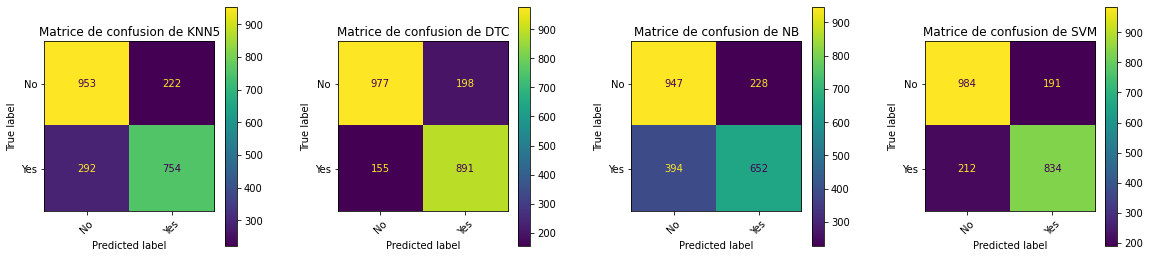

In [ ]:
models=[knn5,clf2,nb,svc]
models_name=["KNN5","DTC","NB","SVM"]
fig, axes = plt.subplots(1,4, figsize=(17, 5))
fig.tight_layout(pad=5.0)
for model, ax,model_name in zip(models, axes.flatten(),models_name):
    
    plot=plot_confusion_matrix(model, X_test_s, y_test, display_labels=["No","Yes"],ax=ax)
    
    ax.tick_params(axis='x', rotation=45)
    plot.ax_.set_title("Matrice de confusion de "+model_name)

In [ ]:
scores_data = {'model_name':  ['KNN5', 'DTC', 'NB','SVM'],
        'accuracy_train': [report_knn5_train['accuracy'], report_clf2_train['accuracy'], report_nb_train['accuracy'],report_svm_train['accuracy'] ],
          'accuracy_test': [report_knn5_test['accuracy'] ,report_clf2_test['accuracy'], report_nb_test['accuracy'],report_svm_test['accuracy'] ],
          'precision_train': [report_knn5_train['macro avg']['precision'] ,report_clf2_train['macro avg']['precision'], report_nb_train['macro avg']['precision'],report_svm_train['macro avg']['precision'] ] ,
          'precision_test': [report_knn5_test['macro avg']['precision'] ,report_clf2_test['macro avg']['precision'], report_nb_test['macro avg']['precision'],report_svm_test['macro avg']['precision'] ] ,
          'recall_train': [report_knn5_train['macro avg']['recall'] ,report_clf2_train['macro avg']['recall'], report_nb_train['macro avg']['recall'],report_svm_train['macro avg']['recall']] ,
          'recall_test': [report_knn5_test['macro avg']['precision'],report_clf2_test['macro avg']['precision'],report_nb_test['macro avg']['precision'],report_svm_test['macro avg']['precision']] ,
          'f1_train': [report_knn5_train['macro avg']['f1-score'],report_clf2_train['macro avg']['f1-score'],report_nb_train['macro avg']['f1-score'],report_svm_train['macro avg']['f1-score']] ,
          'f1_test': [report_knn5_test['macro avg']['f1-score'] ,report_clf2_test['macro avg']['f1-score'] ,report_nb_test['macro avg']['f1-score'] ,report_svm_test['macro avg']['f1-score']] 
        }
scores = pd.DataFrame(scores_data)
scores.set_index('model_name', inplace=True)

In [ ]:
output = scores.style.format({
    'accuracy_train': '{:,.2%}'.format,
    'accuracy_test': '{:,.2%}'.format,
    'precision_train': '{:,.2%}'.format,
    'precision_test': '{:,.2%}'.format,
    'recall_train': '{:,.2%}'.format,
    'recall_test': '{:,.2%}'.format,
    'f1_train': '{:,.2%}'.format,
    'f1_test': '{:,.2%}'.format,
})
output

,accuracy_train,accuracy_test,precision_train,precision_test,recall_train,recall_test,f1_train,f1_test
model_name,,,,,,,,
KNN5,82.63%,76.86%,82.73%,76.90%,82.44%,76.90%,82.52%,76.67%
DTC,84.65%,84.11%,84.60%,84.06%,84.64%,84.06%,84.62%,84.08%
NB,71.81%,71.99%,72.29%,72.35%,71.32%,72.35%,71.31%,71.49%
SVM,82.49%,81.86%,82.46%,81.82%,82.39%,81.82%,82.42%,81.77%


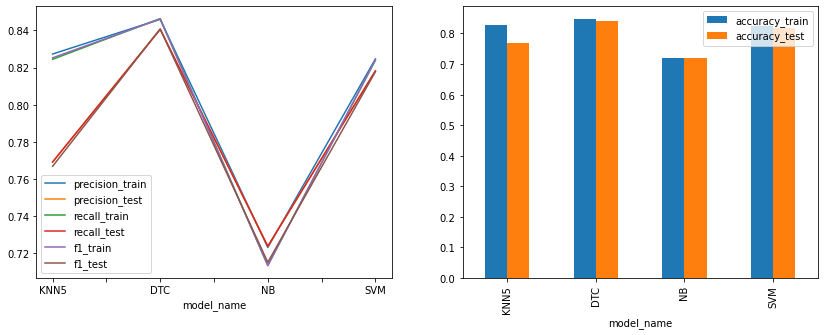

In [ ]:
fig,(ax1, ax2) = plt.subplots(1, 2,figsize=(20, 10))
score1=scores.loc[:,["precision_train","precision_test","recall_train","recall_test","f1_train","f1_test"]]
score1.plot(kind="line", figsize = (14, 5),ax=ax1)

score2=scores.loc[:,["accuracy_train","accuracy_test"]]
score2.plot(kind="bar", figsize = (14, 5),ax=ax2)

plt.show()

Le modèle le plus performant est SVM.

# Classification non supervisée (Clustering )

### K-means

#### without PCA

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X_scaled = ms.fit_transform(X)

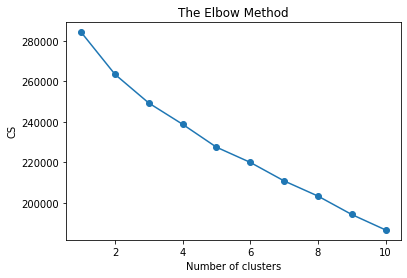

In [ ]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_train_s)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
cs

[284287.9999999997,
 263486.3407949456,
 249303.2849271188,
 238807.67595385783,
 227496.3544920173,
 219980.55833390605,
 210824.28404503225,
 203343.75708994857,
 194231.40553518108,
 186607.85078165424]

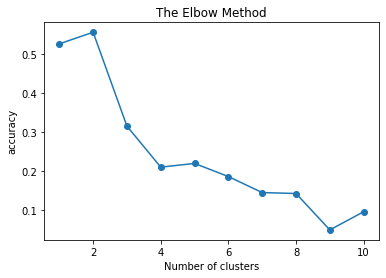

In [ ]:
accuracies = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_scaled)
    correct_labels = sum(Y == kmeans.labels_)
    accuracies.append(correct_labels/float(Y.size))
plt.plot(range(1, 11), accuracies,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('accuracy')
plt.savefig("p.png")
plt.show()

In [ ]:
accuracies

[0.5263394867176947,
 0.5561458802341288,
 0.315083295812697,
 0.20972534894191805,
 0.190004502476362,
 0.11886537595677622,
 0.11571364250337686,
 0.114993246285457,
 0.0755515533543449,
 0.13660513282305267]

#####**k=2**

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [ ]:
correct_labels = sum(Y == kmeans.labels_)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, Y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(Y.size)))

Result: 5094 out of 11105 samples were correctly labeled.
Accuracy score: 0.46


##### with PCA


In [ ]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

In [ ]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(X) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)


,P1,P2
0,-0.413049,-0.130399
1,-0.318719,-0.100153


#### Elbow method

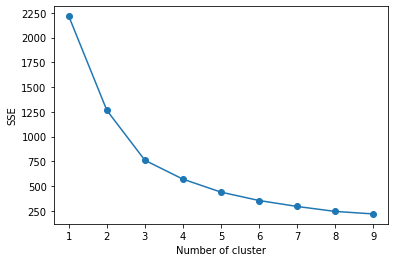

In [ ]:
sse = {} #sum of squeared  errors
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()),marker='o')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.savefig("p2.png")
plt.show()

#### Silhouette Coefficient Method

In [ ]:
from sklearn.metrics import silhouette_score

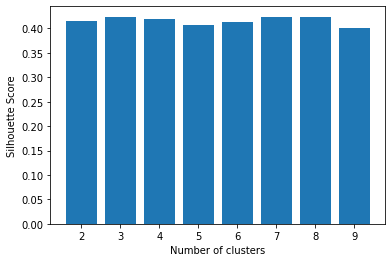

In [ ]:
silhouette_scores = [] 

for n_cluster in range(2, 10):
    silhouette_scores.append( 
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.savefig("p3.png")
plt.show() 

#### k=3

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_principal)

KMeans(n_clusters=3)

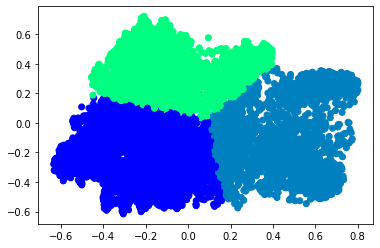

In [ ]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.savefig("p4.png")
plt.show()

### Hierarchical Agglomerative Clustering (HAC)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=False)
model_ac = ac.fit(X_train_s)
train_predicted = model_ac.fit_predict(X_train_s)
test_predicted = model_ac.fit_predict(X_test_s)
print(train_predicted.shape, y_train.shape)
print(test_predicted.shape, y_test.shape)

(8884,) (8884,)
(2221,) (2221,)


#### Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, train_predicted)
test_accuracy = accuracy_score(y_test, test_predicted)

from sklearn.metrics import classification_report
print("Le rapport de l'ensemble d'apprentissage: \n",classification_report(y_train,train_predicted))
print("Le rapport de l'ensemble de test: \n",classification_report(y_test,test_predicted))


Le rapport de l'ensemble d'apprentissage: 
               precision    recall  f1-score   support

           0       0.58      0.86      0.69      4670
           1       0.66      0.30      0.41      4214

    accuracy                           0.59      8884
   macro avg       0.62      0.58      0.55      8884
weighted avg       0.61      0.59      0.56      8884

Le rapport de l'ensemble de test: 
               precision    recall  f1-score   support

           0       0.55      0.96      0.70      1175
           1       0.70      0.11      0.19      1046

    accuracy                           0.56      2221
   macro avg       0.63      0.54      0.45      2221
weighted avg       0.62      0.56      0.46      2221



### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=3, min_samples=500)

model_dbs = dbs.fit(X_train_s)
predicted_train = list(map(lambda x: x+1, model_dbs.fit_predict(X_train_s)))
predicted_test = list(map(lambda x: x+1, model_dbs.fit_predict(X_test_s)))

####Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, predicted_train)
test_accuracy = accuracy_score(y_test, predicted_test)


print("Le rapport de l'ensemble d'apprentissage: \n",classification_report(y_train,predicted_train))
print("Le rapport de l'ensemble de test: \n",classification_report(y_test,predicted_test))


Le rapport de l'ensemble d'apprentissage: 
               precision    recall  f1-score   support

           0       0.53      1.00      0.69      4670
           1       0.00      0.00      0.00      4214

    accuracy                           0.53      8884
   macro avg       0.26      0.50      0.34      8884
weighted avg       0.28      0.53      0.36      8884

Le rapport de l'ensemble de test: 
               precision    recall  f1-score   support

           0       0.53      1.00      0.69      1175
           1       0.00      0.00      0.00      1046

    accuracy                           0.53      2221
   macro avg       0.26      0.50      0.35      2221
weighted avg       0.28      0.53      0.37      2221



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

# Deep Learning

### MLP

In [ ]:
mlp = MLPClassifier()
mlp.fit(X_train_s, y_train)
mlpprediction = mlp.predict(X_test_s)
print("Valeur prédictée :", mlpprediction[:10])
print("Valeur actuelle :", y_test[:10])

Valeur prédictée : [0 1 0 1 1 1 1 1 1 1]
Valeur actuelle : 5785    0
9850    0
5308    0
4639    1
3771    1
9098    0
1409    1
1801    1
3702    1
4557    1
Name: deposit, dtype: int64


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Evaluation de performance de MLP

In [ ]:
mlp_test_accuracy=metrics.accuracy_score(y_test,mlpprediction)
mlp_train_accuracy=mlp.score(X_train_s,y_train)
print(f"Le score d'accuracy des tests est {mlp_test_accuracy*100:.2f}%")
print(f"Le score d'accuracy du train est {mlp_train_accuracy*100:.2f}%")

Le score d'accuracy des tests est 82.08%
Le score d'accuracy du train est 90.12%


### CNN

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam

In [ ]:
X_train = X_train_s / 255
X_test = X_test_s / 255

In [ ]:
# Create the model
model = Sequential()
# Add a 1D convolutional layer with 64 filters and kernel size of 3, inpu_shape (29 features, and 1 output binary classification)
model.add(Conv1D(filters=64, kernel_size=3, input_shape=(31, 1)))
# Add a ReLU activation function
model.add(Activation('relu'))
# Add a max pooling layer with pool size of 2
model.add(MaxPooling1D(pool_size=2))
# Flatten the output of the max pooling layer
model.add(Flatten())
# Add a dense layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu'))
# Add a dropout layer with dropout rate of 0.5
model.add(Dropout(0.5))
# Add a final dense layer with 2 units and softmax activation for output
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
X_train.shape

(8884, 31)

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
278/278 [==============================] - 2s 5ms/step - loss: 0.6914 - accuracy: 0.5247 - val_loss: 0.6905 - val_accuracy: 0.5290
Epoch 2/10
278/278 [==============================] - 1s 5ms/step - loss: 0.6809 - accuracy: 0.5576 - val_loss: 0.6562 - val_accuracy: 0.6736
Epoch 3/10
278/278 [==============================] - 1s 4ms/step - loss: 0.6285 - accuracy: 0.6561 - val_loss: 0.5953 - val_accuracy: 0.7064
Epoch 4/10
278/278 [==============================] - 2s 7ms/step - loss: 0.5873 - accuracy: 0.6852 - val_loss: 0.5618 - val_accuracy: 0.7168
Epoch 5/10
278/278 [==============================] - 2s 9ms/step - loss: 0.5654 - accuracy: 0.7050 - val_loss: 0.5459 - val_accuracy: 0.7271
Epoch 6/10
278/278 [==============================] - 2s 9ms/step - loss: 0.5513 - accuracy: 0.7151 - val_loss: 0.5377 - val_accuracy: 0.7294
Epoch 7/10
278/278 [==============================] - 1s 5ms/step - loss: 0.5390 - accuracy: 0.7235 - val_loss: 0.5191 - val_accuracy: 0.7456
Epoch 

#### Evaluation de performance de CNN

In [ ]:
# Evaluate the model
# Get the accuracy score on the test data
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])


Test accuracy: 0.7721747159957886
